In [118]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13


In [119]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [120]:
data = sdf.read(all_files[0])

In [121]:
def plot_density_with_scale(id, component="p"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "a": raw_data.Derived_Number_Density,
        "p": raw_data.Derived_Number_Density_Proton,
        "e": raw_data.Derived_Number_Density_Electron,
    }
    field = comp[component]
    t = raw_data.Header["time"] * 1e15
    # field = field / (field.max() + 1e-10)
    t = raw_data.Header["time"] * 1e15
    c_label = field.name
    plt.ion()
    plt.figure(figsize=(15, 8))
    plt.imshow(
        field.data, cmap="jet", origin="lower", extent=EXTENT, aspect="auto",
    )
    plt.xlabel("$Y \, [\mu m]$")
    plt.ylabel("$X \, [\mu m]$")
    plt.title(f"t = {t:.0f} fs")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(c_label)
    plt.show()

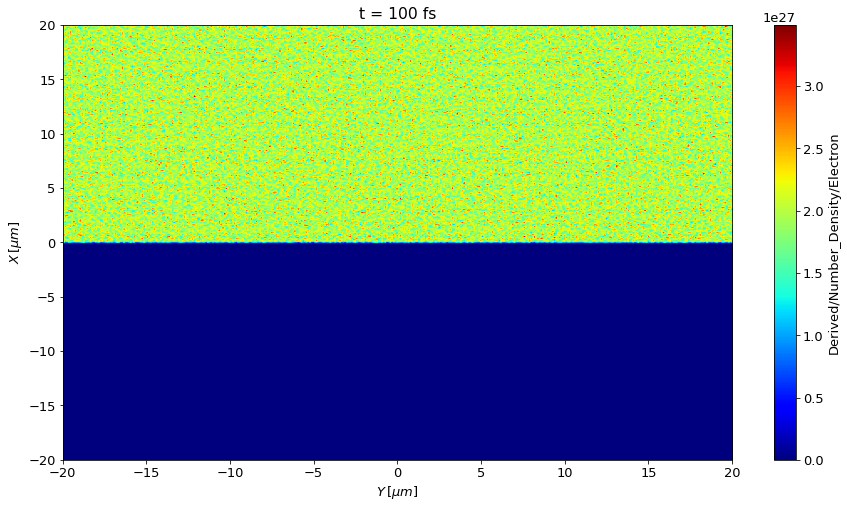

In [122]:
plot_density_with_scale(10, component="e")

In [123]:
def plot_density(id, ax, component="p"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "a": raw_data.Derived_Number_Density,
        "p": raw_data.Derived_Number_Density_Proton,
        "e": raw_data.Derived_Number_Density_Electron,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    ax.imshow(
        field,
        cmap="jet",
        origin="lower",
        extent=EXTENT,
        aspect="auto",
        interpolation="nearest",
        # norm=colors.Normalize(vmin=-0.3, vmax=0.5),
    )
    ax.set_xlabel("$y \, [\mu m]$")
    ax.set_ylabel("$x \, [\mu m]$")
    ax.set_title(f"t = {t:.0f} fs")

def plot_field(data_dir, ax, component="y"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    field = field / (field.max() + 1e-10)
    ax.imshow(
        field ** 2,
        cmap="jet",
        origin="lower",
        extent=EXTENT,
        aspect="auto",
        interpolation="nearest",
        # norm=colors.Normalize(vmin=-0.3, vmax=0.5),
    )
    ax.axhline(0, color="red", lw = 2)
    ax.set_xlabel("$y \, [\mu m]$")
    ax.set_ylabel("$x \, [\mu m]$")
    ax.set_title(f"t = {t:.0f} fs")
    
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


def plot_with_scale(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component]

    t = raw_data.Header["time"] * 1e15
    c_label = f"$(E_{component})^2$ in $({field.units})^2$"
    plt.ion()
    plt.figure(figsize=(15, 8))
    plt.imshow(
        field.data ** 2, cmap="jet", origin="lower", extent=EXTENT, aspect="auto",
    )
    plt.xlabel("$Y \, [\mu m]$")
    plt.ylabel("$X \, [\mu m]$")
    plt.title(f"t = {t:.0f} fs")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(c_label)
    plt.show()

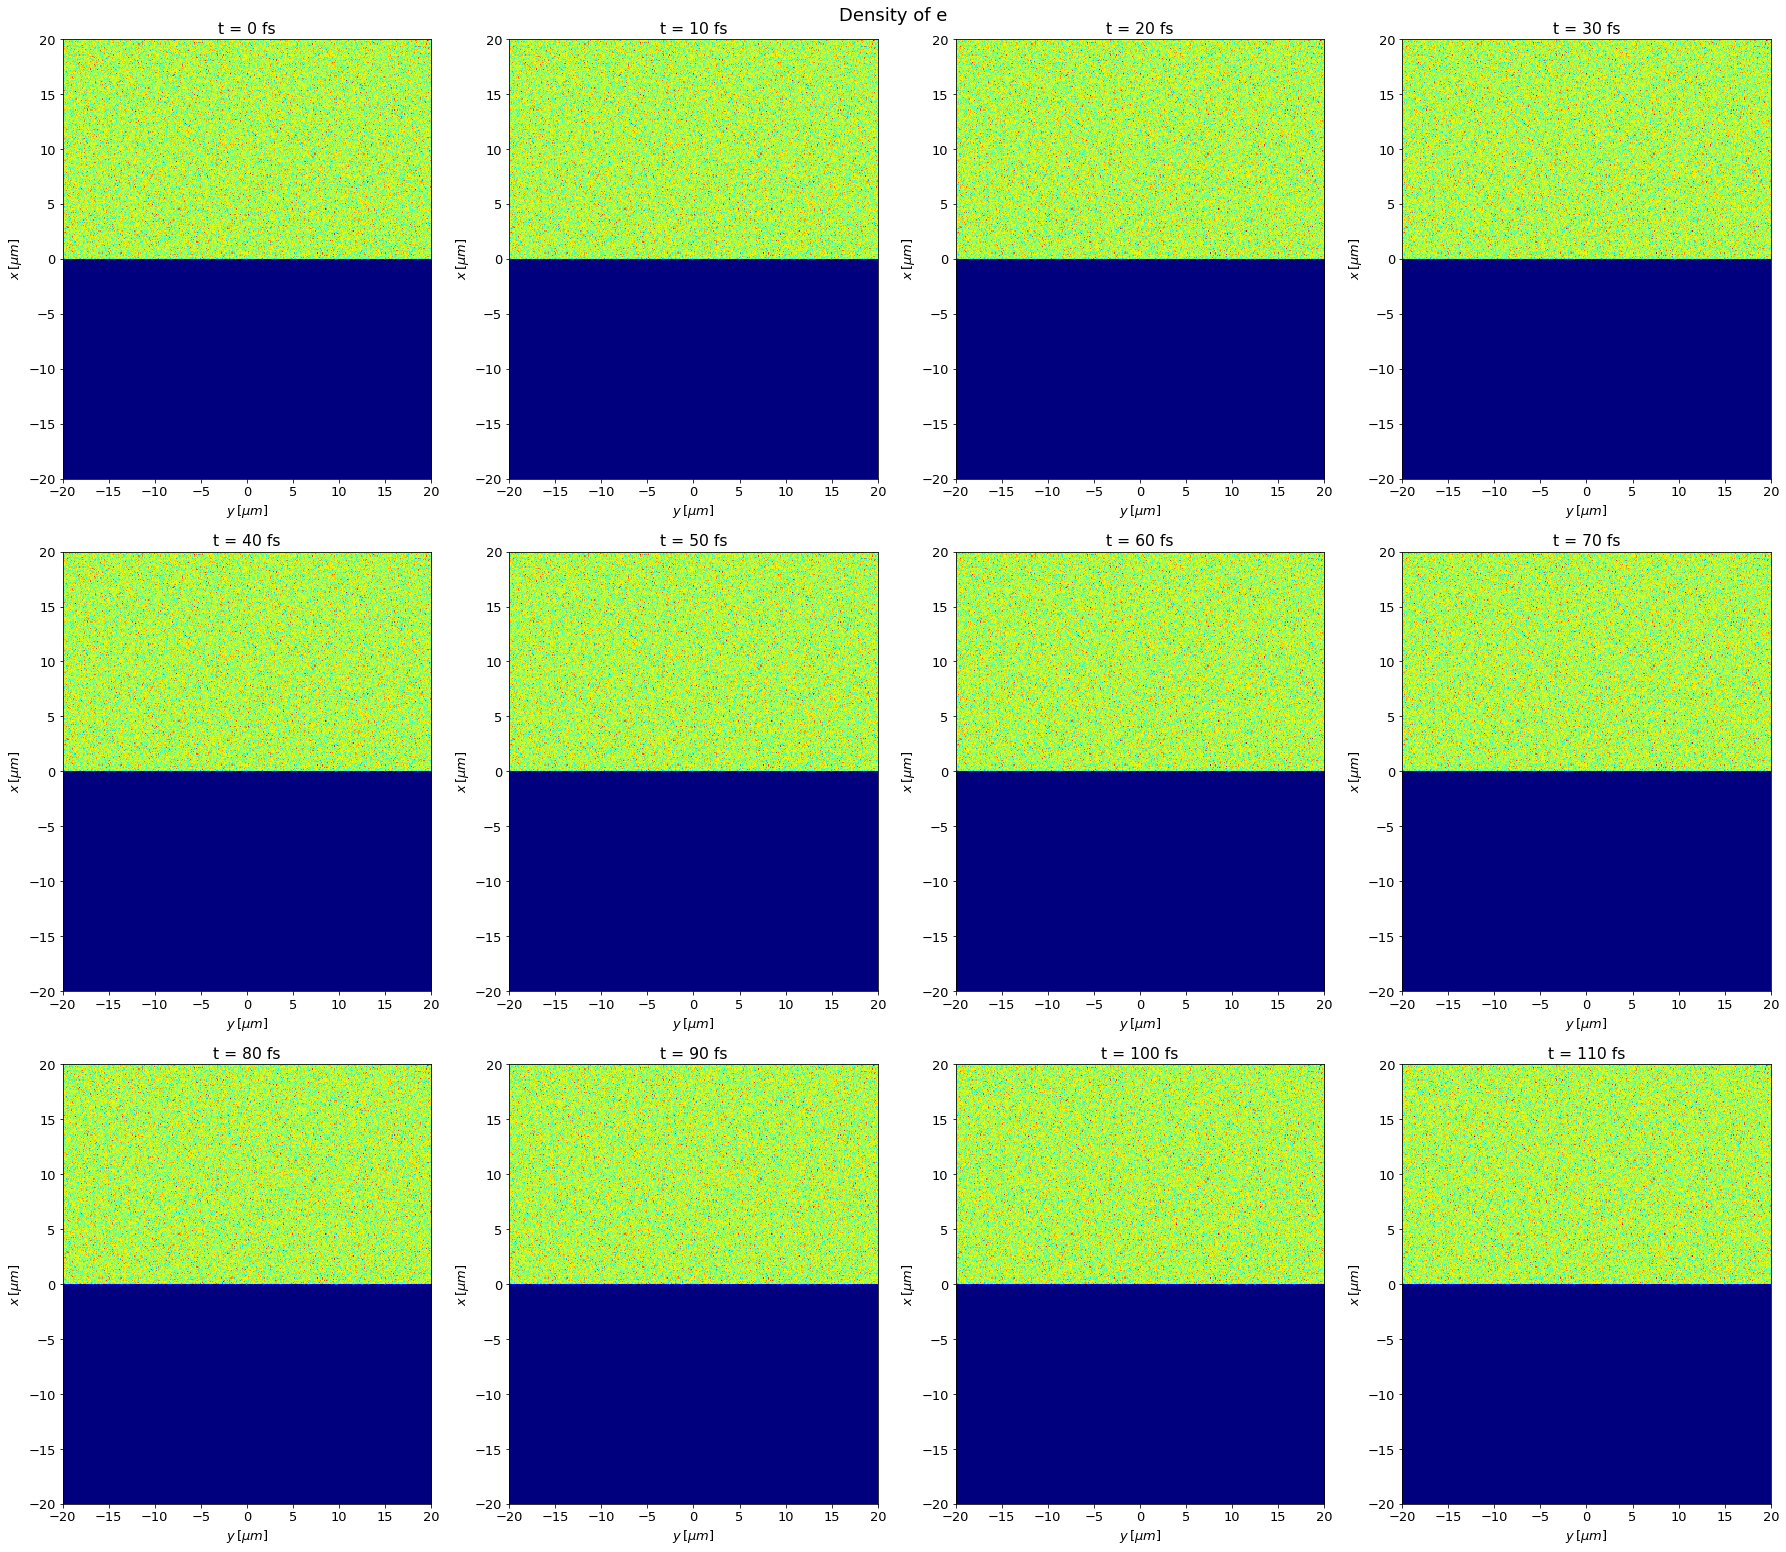

In [124]:
fig, ax = plt.subplots(3, 4, figsize=(25, 22))
component = "e"
fig.suptitle(f"Density of {component}", fontsize=18)
for i in range(len(all_files)):
    # print(i)
    plot_density(i, ax[i // 4, i % 4], component=component)
fig.tight_layout()

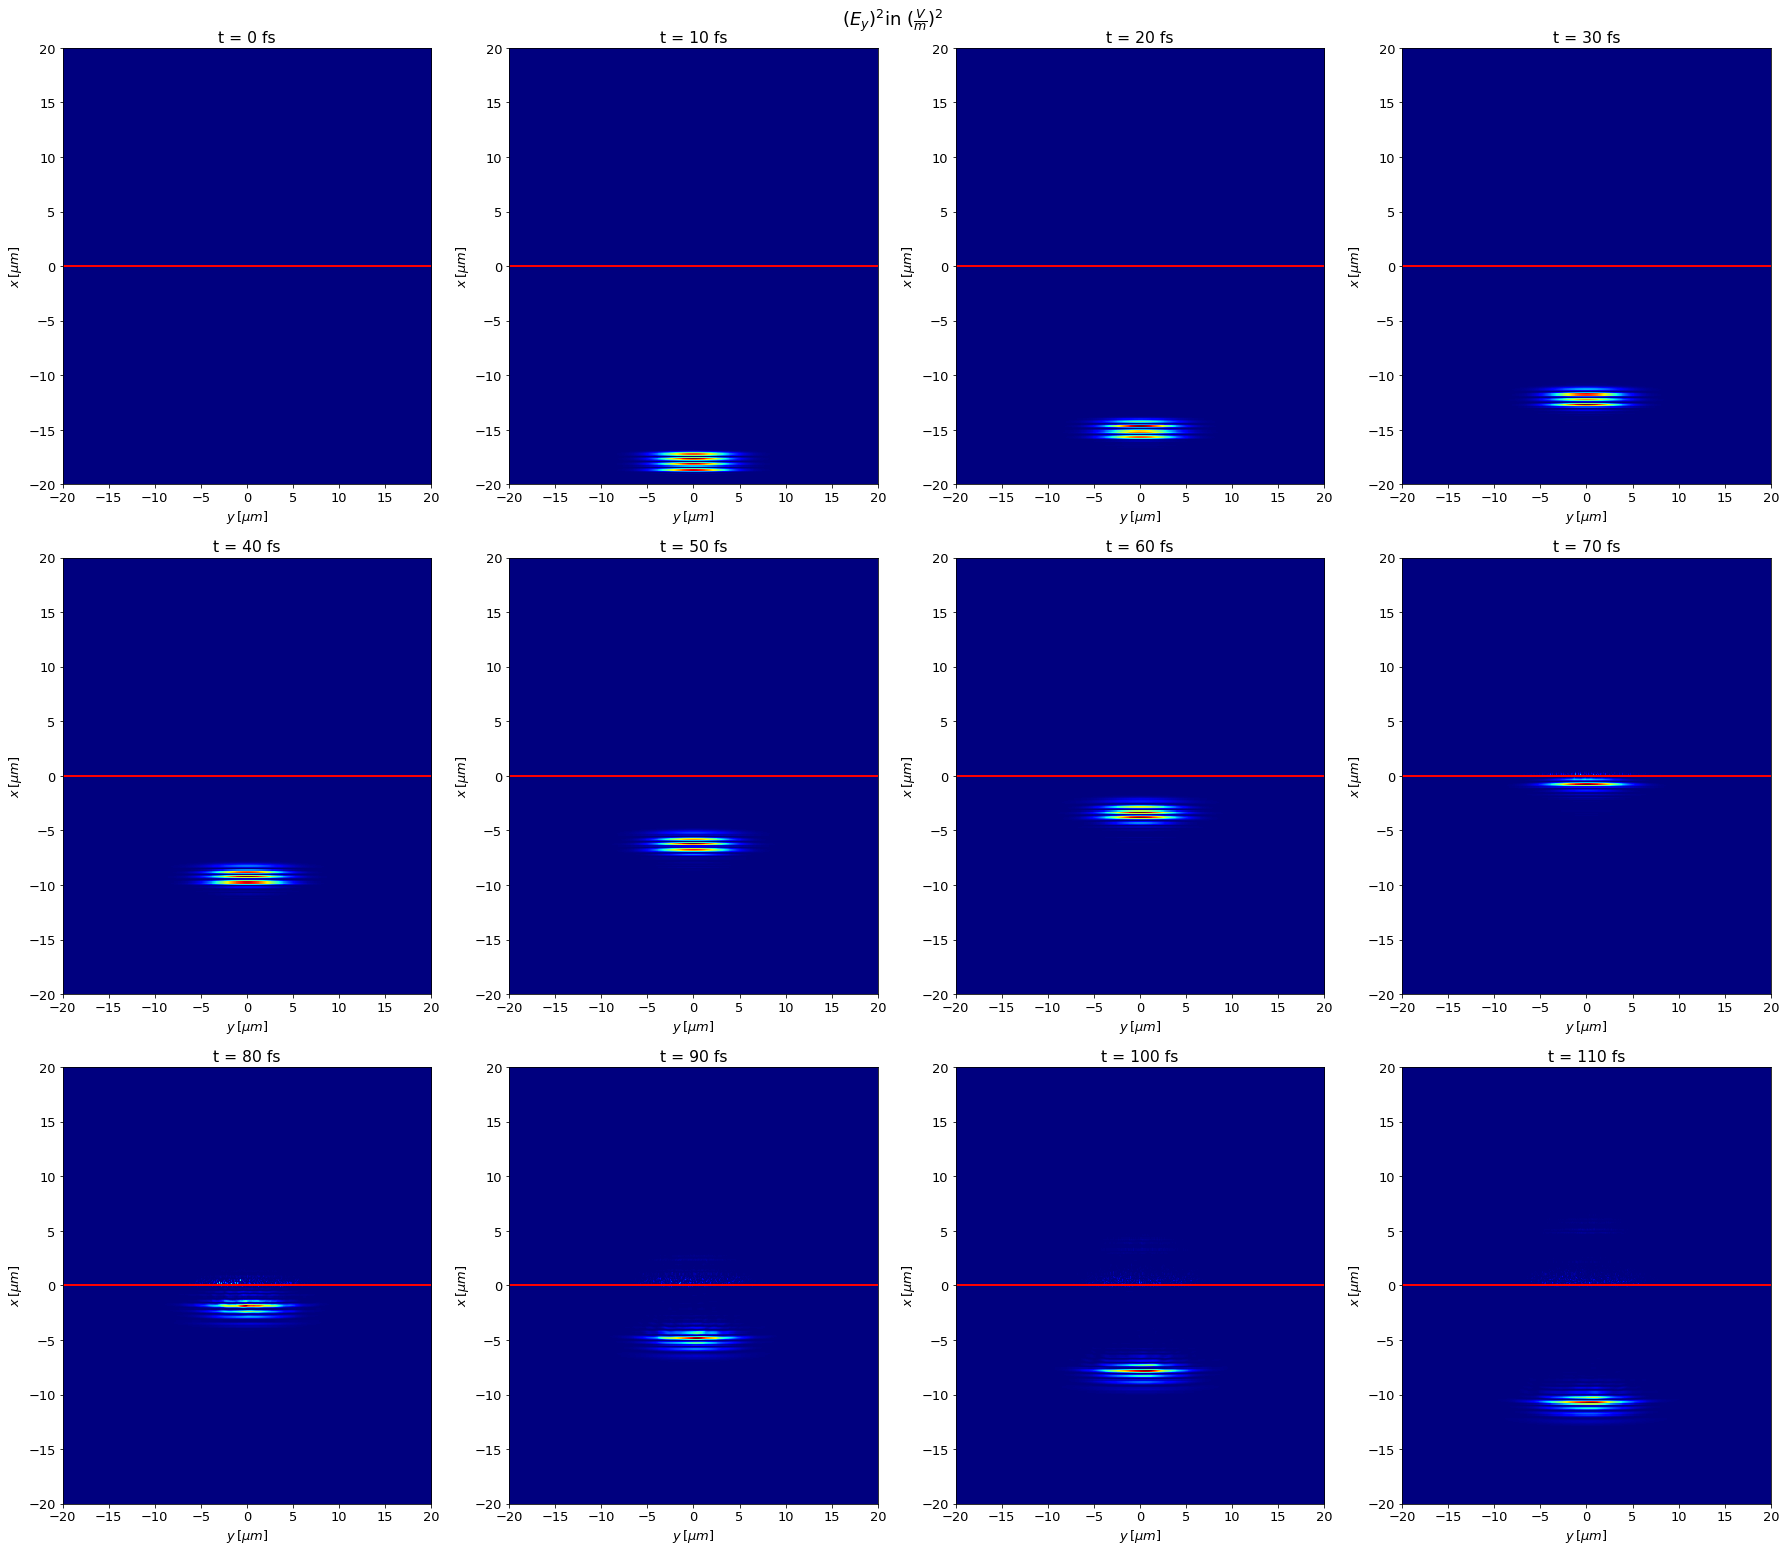

In [125]:
fig, ax = plt.subplots(3, 4, figsize=(25, 22))
i = 0
component = "y"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" + r"in $({\frac{V}{m}})^2$", fontsize=18)
i = 0
for data_dir in all_files:
    t = i * 10
    plot_field(data_dir, ax[i // 4, i % 4], component=component)
    i += 1
fig.tight_layout()

In [126]:
import numpy.fft as fft

In [127]:
Ey.shape

(400, 400)

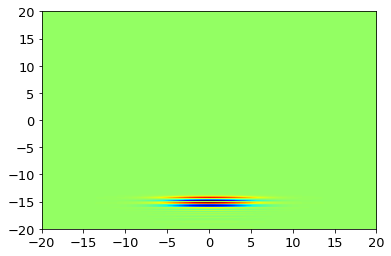

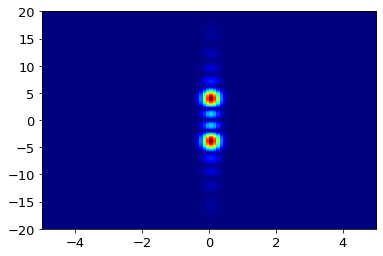

In [210]:
Ey = get_field(2, component="y")
plt.imshow(Ey, cmap="jet", origin="lower", extent=EXTENT, aspect="auto", interpolation="nearest")
plt.show()
Ey_n = Ey.copy()
# window = np.hanning(Ey.shape[0])
# for i in range(Ey.shape[1]):
#     Ey_n[:, i] = Ey_n[:, i] * window
Ey_f = np.abs(fft.fft2(Ey_n))

Ey_f = fft.fftshift(Ey_f)

plt.imshow(Ey_f, cmap="jet", origin="lower", extent=EXTENT, aspect="auto", interpolation="nearest")
plt.xlim(-5, 5);

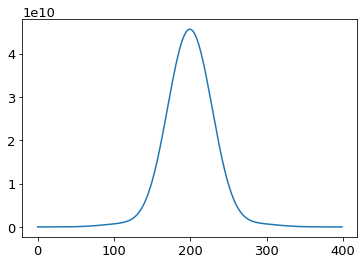

In [211]:
plt.plot(Ey[50])

(195.0, 400.0)

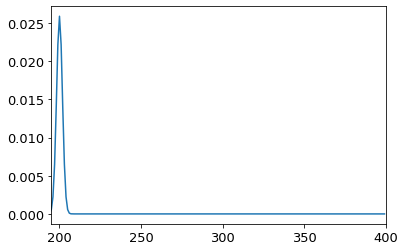

In [212]:
plt.plot(Ey_f[50]/Ey_f.max())
plt.xlim(195, 400)
# plt.ylim(0, 0.25)

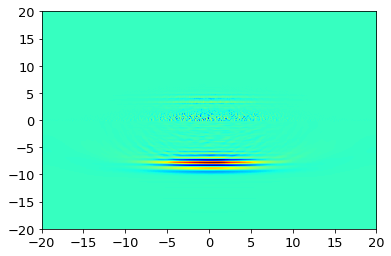

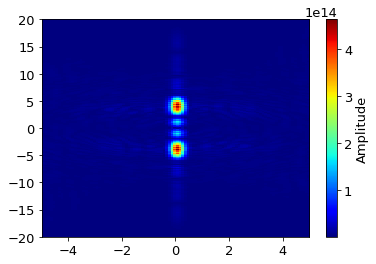

In [207]:
Ey = get_field(10, component="y")
plt.imshow(Ey, cmap="jet", origin="lower", extent=EXTENT, aspect="auto", interpolation="nearest")
plt.show()
Ey_f = np.abs(fft.fft2(Ey))
Ey_f = fft.fftshift(Ey_f)

plt.imshow(Ey_f, cmap="jet", origin="lower", extent=EXTENT, aspect="auto", interpolation="nearest")
#set colour bar
cbar = plt.colorbar()
cbar.ax.set_ylabel("Amplitude")
plt.xlim(-5, 5);

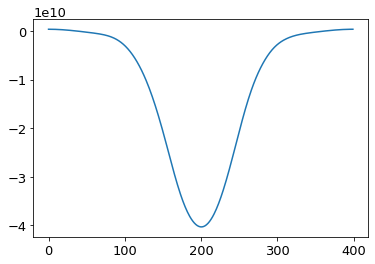

In [208]:
plt.plot(Ey[100])

(0.0, 1.0)

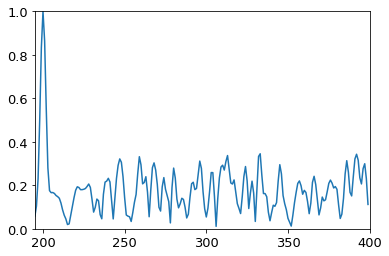

In [209]:
plt.plot(Ey_f[100]/Ey_f[100].max())
plt.xlim(195, 400)
plt.ylim(0, 1)